In [ ]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/simulated_nhis_healthcare_claims 1(2).csv")

In [ ]:
df

,Patient ID,Age,Gender,Date Admitted,Date Discharged,Diagnosis,Treatment,Amount Billed,Fraud Type
0,9b484756-3a0d-47f4-ada3-fb63ed2d1082,82,Male,2023-02-06,2023-02-06,Appendectomy,Appendectomy,144764.37,No Fraud
1,0240f93e-8c46-4c2a-a4cb-827ecf527d36,29,Male,2022-09-03,2022-09-04,Cesarean Section,Fake Cesarean Section,531434.03,Fake Treatment
2,0e0e0476-cf0f-4b87-828c-a34bdd780e68,70,Male,2022-10-02,2022-10-17,Advanced Spinal Surgery,Phantom Procedure,128604.41,Phantom Billing
3,ad669adf-568d-4346-b60e-a26a3374f00d,12,Male,2023-11-15,2023-11-20,Peptic Ulcer,Peptic Ulcer,304989.18,No Fraud
4,9c0cc9c5-ff6f-442b-9c25-60ad3f1a4400,72,Male,2022-11-15,2022-12-04,Appendectomy,Appendectomy,277021.33,No Fraud
...,...,...,...,...,...,...,...,...,...
1495,7451a2b9-a318-4449-b411-7d17b1b72fa9,19,Male,2024-01-30,2024-01-30,Peptic Ulcer,Peptic Ulcer,147894.70,Ghost Enrollee
1496,29300ff5-1aef-418d-9f06-9b1717ccb6b2,100,Female,2023-12-30,2024-01-05,HIV/AIDS,HIV/AIDS,461244.61,Ghost Enrollee
1497,a75108fa-64fb-480f-8c73-392b6fc0c953,21,Male,2024-01-20,2024-01-21,Pneumonia,Pneumonia,256657.62,No Fraud
1498,8c638d95-5e6b-4ece-b320-9fc5e5a26f24,25,Male,2023-02-19,2023-02-21,Hepatitis B,Hepatitis B,458855.27,No Fraud


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient ID       1500 non-null   object 
 1   Age              1500 non-null   int64  
 2   Gender           1500 non-null   object 
 3   Date Admitted    1500 non-null   object 
 4   Date Discharged  1500 non-null   object 
 5   Diagnosis        1500 non-null   object 
 6   Treatment        1500 non-null   object 
 7   Amount Billed    1500 non-null   float64
 8   Fraud Type       1500 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 105.6+ KB


In [ ]:
df['Date Admitted']= pd.to_datetime(df['Date Admitted'])
df['Date Discharged']= pd.to_datetime(df['Date Discharged']
                                      )

In [ ]:


df['Days_stayed']= (df['Date Discharged']-df['Date Admitted']).dt.days

In [ ]:

df

,Patient ID,Age,Gender,Date Admitted,Date Discharged,Diagnosis,Treatment,Amount Billed,Fraud Type,Days_stayed
0,9b484756-3a0d-47f4-ada3-fb63ed2d1082,82,Male,2023-02-06,2023-02-06,Appendectomy,Appendectomy,144764.37,No Fraud,0
1,0240f93e-8c46-4c2a-a4cb-827ecf527d36,29,Male,2022-09-03,2022-09-04,Cesarean Section,Fake Cesarean Section,531434.03,Fake Treatment,1
2,0e0e0476-cf0f-4b87-828c-a34bdd780e68,70,Male,2022-10-02,2022-10-17,Advanced Spinal Surgery,Phantom Procedure,128604.41,Phantom Billing,15
3,ad669adf-568d-4346-b60e-a26a3374f00d,12,Male,2023-11-15,2023-11-20,Peptic Ulcer,Peptic Ulcer,304989.18,No Fraud,5
4,9c0cc9c5-ff6f-442b-9c25-60ad3f1a4400,72,Male,2022-11-15,2022-12-04,Appendectomy,Appendectomy,277021.33,No Fraud,19
...,...,...,...,...,...,...,...,...,...,...
1495,7451a2b9-a318-4449-b411-7d17b1b72fa9,19,Male,2024-01-30,2024-01-30,Peptic Ulcer,Peptic Ulcer,147894.70,Ghost Enrollee,0
1496,29300ff5-1aef-418d-9f06-9b1717ccb6b2,100,Female,2023-12-30,2024-01-05,HIV/AIDS,HIV/AIDS,461244.61,Ghost Enrollee,6
1497,a75108fa-64fb-480f-8c73-392b6fc0c953,21,Male,2024-01-20,2024-01-21,Pneumonia,Pneumonia,256657.62,No Fraud,1
1498,8c638d95-5e6b-4ece-b320-9fc5e5a26f24,25,Male,2023-02-19,2023-02-21,Hepatitis B,Hepatitis B,458855.27,No Fraud,2


In [ ]:
df=df.drop(['Date Discharged','Date Admitted'],axis=1)

In [ ]:
df

,Patient ID,Age,Gender,Diagnosis,Treatment,Amount Billed,Fraud Type,Days_stayed
0,9b484756-3a0d-47f4-ada3-fb63ed2d1082,82,Male,Appendectomy,Appendectomy,144764.37,No Fraud,0
1,0240f93e-8c46-4c2a-a4cb-827ecf527d36,29,Male,Cesarean Section,Fake Cesarean Section,531434.03,Fake Treatment,1
2,0e0e0476-cf0f-4b87-828c-a34bdd780e68,70,Male,Advanced Spinal Surgery,Phantom Procedure,128604.41,Phantom Billing,15
3,ad669adf-568d-4346-b60e-a26a3374f00d,12,Male,Peptic Ulcer,Peptic Ulcer,304989.18,No Fraud,5
4,9c0cc9c5-ff6f-442b-9c25-60ad3f1a4400,72,Male,Appendectomy,Appendectomy,277021.33,No Fraud,19
...,...,...,...,...,...,...,...,...
1495,7451a2b9-a318-4449-b411-7d17b1b72fa9,19,Male,Peptic Ulcer,Peptic Ulcer,147894.70,Ghost Enrollee,0
1496,29300ff5-1aef-418d-9f06-9b1717ccb6b2,100,Female,HIV/AIDS,HIV/AIDS,461244.61,Ghost Enrollee,6
1497,a75108fa-64fb-480f-8c73-392b6fc0c953,21,Male,Pneumonia,Pneumonia,256657.62,No Fraud,1
1498,8c638d95-5e6b-4ece-b320-9fc5e5a26f24,25,Male,Hepatitis B,Hepatitis B,458855.27,No Fraud,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient ID     1500 non-null   object 
 1   Age            1500 non-null   int64  
 2   Gender         1500 non-null   object 
 3   Diagnosis      1500 non-null   object 
 4   Treatment      1500 non-null   object 
 5   Amount Billed  1500 non-null   float64
 6   Fraud Type     1500 non-null   object 
 7   Days_stayed    1500 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 93.9+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

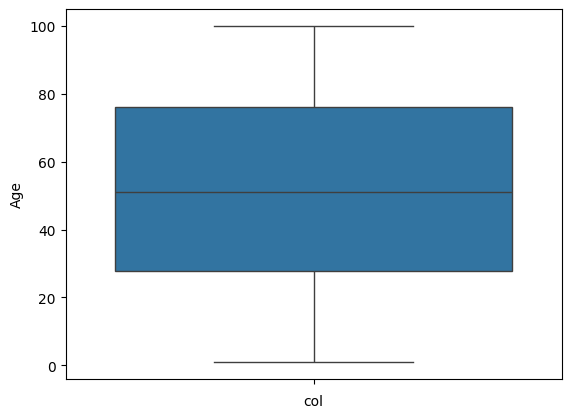

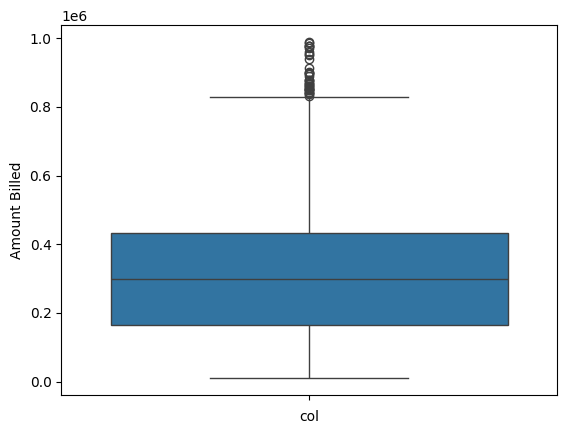

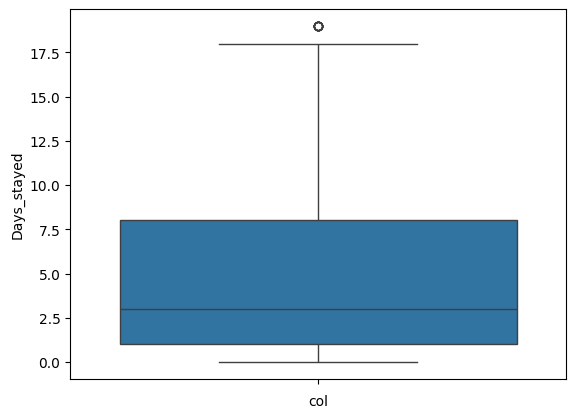

In [ ]:
for col in df.columns:
  if(df[col].dtype!='object'):
    sns.boxplot(df[col])
    plt.xlabel('col')
    plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:

import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le  # store each encoder

# Save encoders
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [ ]:
df.dtypes


,0
Patient ID,int64
Age,int64
Gender,int64
Diagnosis,int64
Treatment,int64
Amount Billed,float64
Fraud Type,int64
Days_stayed,int64


In [ ]:
df

,Patient ID,Age,Gender,Diagnosis,Treatment,Amount Billed,Fraud Type,Days_stayed
0,923,82,1,1,0,144764.37,2,0
1,13,29,1,5,8,531434.03,0,1
2,88,70,1,0,25,128604.41,3,15
3,1033,12,1,18,24,304989.18,2,5
4,930,72,1,1,0,277021.33,2,19
...,...,...,...,...,...,...,...,...
1495,705,19,1,18,24,147894.70,1,0
1496,253,100,0,11,20,461244.61,1,6
1497,992,21,1,19,26,256657.62,2,1
1498,849,25,1,12,21,458855.27,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient ID     1500 non-null   int64  
 1   Age            1500 non-null   int64  
 2   Gender         1500 non-null   int64  
 3   Diagnosis      1500 non-null   int64  
 4   Treatment      1500 non-null   int64  
 5   Amount Billed  1500 non-null   float64
 6   Fraud Type     1500 non-null   int64  
 7   Days_stayed    1500 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 93.9 KB


In [ ]:
# Split data (adjust 'Fraud Type' if your target column is different)
X = df.drop('Fraud Type', axis=1)
y = df['Fraud Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model
with open("fraud_detection_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model and encoders saved successfully!")

✅ Model and encoders saved successfully!


In [ ]:
# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("✅ Model Training Completed!\n")
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Model Training Completed!

🎯 Accuracy: 0.9033333333333333

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.00      0.00      0.00        29
           2       0.87      1.00      0.93       188
           3       1.00      1.00      1.00        33

    accuracy                           0.90       300
   macro avg       0.72      0.75      0.73       300
weighted avg       0.82      0.90      0.86       300


🧩 Confusion Matrix:
 [[ 50   0   0   0]
 [  0   0  29   0]
 [  0   0 188   0]
 [  0   0   0  33]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
sample = X_test.iloc[0:1]
print("\n🧠 Sample input:\n", sample)

pred = model.predict(sample)
print("\n🔍 Predicted Fraud Type:", pred)



🧠 Sample input:
       Patient ID  Age  Gender  Diagnosis  Treatment  Amount Billed  \
1116         900   60       0         15         23      281714.95   

      Days_stayed  
1116            0  

🔍 Predicted Fraud Type: [2]


In [ ]:
with open("fraud_detection_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [ ]:
from google.colab import files

# Download both model and encoders to your computer
files.download("fraud_detection_model.pkl")
files.download("label_encoders.pkl")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>